# Build optimized portfolio

In [8]:
!pip install pandas numpy matplotlib statsmodels pandas_datareader datetime yfinance scikit-learn PyPortfolioOpt


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
# Download Load nifty500 stocks prices data.

In [22]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import talib
import warnings
warnings.filterwarnings('ignore')

base_nifty500 = ['360ONE', '3MINDIA', 'ABB', 'ACC', 'ACMESOLAR', 'AIAENG', 'APLAPOLLO', 'AUBANK', 'AWL', 'AADHARHFC', 'AARTIIND', 'AAVAS', 'ABBOTINDIA', 'ACE', 'ADANIENSOL', 'ADANIENT', 'ADANIGREEN', 'ADANIPORTS', 'ADANIPOWER', 'ATGL', 'ABCAPITAL', 'ABFRL', 'ABREL', 'ABSLAMC', 'AEGISLOG', 'AFCONS', 'AFFLE', 'AJANTPHARM', 'AKUMS', 'APLLTD', 'ALIVUS', 'ALKEM', 'ALKYLAMINE', 'ALOKINDS', 'ARE&M', 'AMBER', 'AMBUJACEM', 'ANANDRATHI', 'ANANTRAJ', 'ANGELONE', 'APARINDS', 'APOLLOHOSP', 'APOLLOTYRE', 'APTUS', 'ASAHIINDIA', 'ASHOKLEY', 'ASIANPAINT', 'ASTERDM', 'ASTRAZEN', 'ASTRAL', 'ATUL', 'AUROPHARMA', 'AIIL', 'DMART', 'AXISBANK', 'BASF', 'BEML', 'BLS', 'BSE', 'BAJAJ-AUTO', 'BAJFINANCE', 'BAJAJFINSV', 'BAJAJHLDNG', 'BAJAJHFL', 'BALKRISIND', 'BALRAMCHIN', 'BANDHANBNK', 'BANKBARODA', 'BANKINDIA', 'MAHABANK', 'BATAINDIA', 'BAYERCROP', 'BERGEPAINT', 'BDL', 'BEL', 'BHARATFORG', 'BHEL', 'BPCL', 'BHARTIARTL', 'BHARTIHEXA', 'BIKAJI', 'BIOCON', 'BSOFT', 'BLUEDART', 'BLUESTARCO', 'BBTC', 'BOSCHLTD', 'FIRSTCRY', 'BRIGADE', 'BRITANNIA', 'MAPMYINDIA', 'CCL', 'CESC', 'CGPOWER', 'CRISIL', 'CAMPUS', 'CANFINHOME', 'CANBK', 'CAPLIPOINT', 'CGCL', 'CARBORUNIV', 'CASTROLIND', 'CEATLTD', 'CENTRALBK', 'CDSL', 'CENTURYPLY', 'CERA', 'CHALET', 'CHAMBLFERT', 'CHENNPETRO', 'CHOLAHLDNG', 'CHOLAFIN', 'CIPLA', 'CUB', 'CLEAN', 'COALINDIA', 'COCHINSHIP', 'COFORGE', 'COHANCE', 'COLPAL', 'CAMS', 'CONCORDBIO', 'CONCOR', 'COROMANDEL', 'CRAFTSMAN', 'CREDITACC', 'CROMPTON', 'CUMMINSIND', 'CYIENT', 'DCMSHRIRAM', 'DLF', 'DOMS', 'DABUR', 'DALBHARAT', 'DATAPATTNS', 'DEEPAKFERT', 'DEEPAKNTR', 'DELHIVERY', 'DEVYANI', 'DIVISLAB', 'DIXON', 'LALPATHLAB', 'DRREDDY', 'EIDPARRY', 'EIHOTEL', 'EICHERMOT', 'ELECON', 'ELGIEQUIP', 'EMAMILTD', 'EMCURE', 'ENDURANCE', 'ENGINERSIN', 'ERIS', 'ESCORTS', 'ETERNAL', 'EXIDEIND', 'NYKAA', 'FEDERALBNK', 'FACT', 'FINCABLES', 'FINPIPE', 'FSL', 'FIVESTAR', 'FORTIS', 'GAIL', 'GVT&D', 'GMRAIRPORT', 'GRSE', 'GICRE', 'GILLETTE', 'GLAND', 'GLAXO', 'GLENMARK', 'MEDANTA', 'GODIGIT', 'GPIL', 'GODFRYPHLP', 'GODREJAGRO', 'GODREJCP', 'GODREJIND', 'GODREJPROP', 'GRANULES', 'GRAPHITE', 'GRASIM', 'GRAVITA', 'GESHIP', 'FLUOROCHEM', 'GUJGASLTD', 'GMDCLTD', 'GNFC', 'GPPL', 'GSPL', 'HEG', 'HBLENGINE', 'HCLTECH', 'HDFCAMC', 'HDFCBANK', 'HDFCLIFE', 'HFCL', 'HAPPSTMNDS', 'HAVELLS', 'HEROMOTOCO', 'HSCL', 'HINDALCO', 'HAL', 'HINDCOPPER', 'HINDPETRO', 'HINDUNILVR', 'HINDZINC', 'POWERINDIA', 'HOMEFIRST', 'HONASA', 'HONAUT', 'HUDCO', 'HYUNDAI', 'ICICIBANK', 'ICICIGI', 'ICICIPRULI', 'IDBI', 'IDFCFIRSTB', 'IFCI', 'IIFL', 'INOXINDIA', 'IRB', 'IRCON', 'ITC', 'ITI', 'INDGN', 'INDIACEM', 'INDIAMART', 'INDIANB', 'IEX', 'INDHOTEL', 'IOC', 'IOB', 'IRCTC', 'IRFC', 'IREDA', 'IGL', 'INDUSTOWER', 'INDUSINDBK', 'NAUKRI', 'INFY', 'INOXWIND', 'INTELLECT', 'INDIGO', 'IGIL', 'IKS', 'IPCALAB', 'JBCHEPHARM', 'JKCEMENT', 'JBMA', 'JKTYRE', 'JMFINANCIL', 'JSWENERGY', 'JSWHL', 'JSWINFRA', 'JSWSTEEL', 'JPPOWER', 'J&KBANK', 'JINDALSAW', 'JSL', 'JINDALSTEL', 'JIOFIN', 'JUBLFOOD', 'JUBLINGREA', 'JUBLPHARMA', 'JWL', 'JUSTDIAL', 'JYOTHYLAB', 'JYOTICNC', 'KPRMILL', 'KEI', 'KNRCON', 'KPITTECH', 'KAJARIACER', 'KPIL', 'KALYANKJIL', 'KANSAINER', 'KARURVYSYA', 'KAYNES', 'KEC', 'KFINTECH', 'KIRLOSBROS', 'KIRLOSENG', 'KOTAKBANK', 'KIMS', 'LTF', 'LTTS', 'LICHSGFIN', 'LTFOODS', 'LTIM', 'LT', 'LATENTVIEW', 'LAURUSLABS', 'LEMONTREE', 'LICI', 'LINDEINDIA', 'LLOYDSME', 'LODHA', 'LUPIN', 'MMTC', 'MRF', 'MGL', 'MAHSEAMLES', 'M&MFIN', 'M&M', 'MANAPPURAM', 'MRPL', 'MANKIND', 'MARICO', 'MARUTI', 'MASTEK', 'MFSL', 'MAXHEALTH', 'MAZDOCK', 'METROPOLIS', 'MINDACORP', 'MSUMI', 'MOTILALOFS', 'MPHASIS', 'MCX', 'MUTHOOTFIN', 'NATCOPHARM', 'NBCC', 'NCC', 'NHPC', 'NLCINDIA', 'NMDC', 'NSLNISP', 'NTPCGREEN', 'NTPC', 'NH', 'NATIONALUM', 'NAVA', 'NAVINFLUOR', 'NESTLEIND', 'NETWEB', 'NETWORK18', 'NEULANDLAB', 'NEWGEN', 'NAM-INDIA', 'NIVABUPA', 'NUVAMA', 'OBEROIRLTY', 'ONGC', 'OIL', 'OLAELEC', 'OLECTRA', 'PAYTM', 'OFSS', 'POLICYBZR', 'PCBL', 'PGEL', 'PIIND', 'PNBHOUSING', 'PNCINFRA', 'PTCIL', 'PVRINOX', 'PAGEIND', 'PATANJALI', 'PERSISTENT', 'PETRONET', 'PFIZER', 'PHOENIXLTD', 'PIDILITIND', 'PEL', 'PPLPHARMA', 'POLYMED', 'POLYCAB', 'POONAWALLA', 'PFC', 'POWERGRID', 'PRAJIND', 'PREMIERENE', 'PRESTIGE', 'PNB', 'RRKABEL', 'RBLBANK', 'RECLTD', 'RHIM', 'RITES', 'RADICO', 'RVNL', 'RAILTEL', 'RAINBOW', 'RKFORGE', 'RCF', 'RTNINDIA', 'RAYMONDLSL', 'RAYMOND', 'REDINGTON', 'RELIANCE', 'RPOWER', 'ROUTE', 'SBFC', 'SBICARD', 'SBILIFE', 'SJVN', 'SKFINDIA', 'SRF', 'SAGILITY', 'SAILIFE', 'SAMMAANCAP', 'MOTHERSON', 'SAPPHIRE', 'SARDAEN', 'SAREGAMA', 'SCHAEFFLER', 'SCHNEIDER', 'SCI', 'SHREECEM', 'RENUKA', 'SHRIRAMFIN', 'SHYAMMETL', 'SIEMENS', 'SIGNATURE', 'SOBHA', 'SOLARINDS', 'SONACOMS', 'SONATSOFTW', 'STARHEALTH', 'SBIN', 'SAIL', 'SWSOLAR', 'SUMICHEM', 'SUNPHARMA', 'SUNTV', 'SUNDARMFIN', 'SUNDRMFAST', 'SUPREMEIND', 'SUZLON', 'SWANENERGY', 'SWIGGY', 'SYNGENE', 'SYRMA', 'TBOTEK', 'TVSMOTOR', 'TANLA', 'TATACHEM', 'TATACOMM', 'TCS', 'TATACONSUM', 'TATAELXSI', 'TATAINVEST', 'TATAMOTORS', 'TATAPOWER', 'TATASTEEL', 'TATATECH', 'TTML', 'TECHM', 'TECHNOE', 'TEJASNET', 'NIACL', 'RAMCOCEM', 'THERMAX', 'TIMKEN', 'TITAGARH', 'TITAN', 'TORNTPHARM', 'TORNTPOWER', 'TARIL', 'TRENT', 'TRIDENT', 'TRIVENI', 'TRITURBINE', 'TIINDIA', 'UCOBANK', 'UNOMINDA', 'UPL', 'UTIAMC', 'ULTRACEMCO', 'UNIONBANK', 'UBL', 'UNITDSPR', 'USHAMART', 'VGUARD', 'DBREALTY', 'VTL', 'VBL', 'MANYAVAR', 'VEDL', 'VIJAYA', 'VMM', 'IDEA', 'VOLTAS', 'WAAREEENER', 'WELCORP', 'WELSPUNLIV', 'WESTLIFE', 'WHIRLPOOL', 'WIPRO', 'WOCKPHARMA', 'YESBANK', 'ZFCVINDIA', 'ZEEL', 'ZENTEC', 'ZENSARTECH', 'ZYDUSLIFE', 'ECLERX']

# base_nifty500 = ['360ONE', '3MINDIA']
nifty500 = [ticker + ".NS" for ticker in base_nifty500]
end_date = '2025-08-28'
start_date = pd.to_datetime(end_date)-pd.DateOffset(365*8)
df = yf.download(tickers=nifty500,
                 start=start_date,
                 end=end_date).stack()

df.index.names = ['date', 'ticker']

df.columns = df.columns.str.lower()

df


[*********************100%***********************]  500 of 500 completed


Price                            close          high           low  \
date       ticker                                                    
2017-08-30 3MINDIA.NS     14062.560547  14099.103755  13745.531702   
           AARTIIND.NS      199.474930    200.136137    194.539416   
           ABB.NS          1184.403198   1197.884318   1176.850247   
           ABBOTINDIA.NS   3978.401611   3991.379643   3941.100996   
           ABFRL.NS         167.077377    169.048798    166.091675   
...                                ...           ...           ...   
2025-08-26 ZEEL.NS          118.230003    120.790001    117.400002   
           ZENSARTECH.NS    804.549988    814.849976    796.000000   
           ZENTEC.NS       1504.099976   1538.099976   1470.000000   
           ZFCVINDIA.NS   14270.000000  14895.000000  14200.000000   
           ZYDUSLIFE.NS     987.849976   1016.950012    982.000000   

Price                             open     volume  
date       ticker                                  
2017-08-30 3MINDIA.NS     13939.017146     1945.0  
           AARTIIND.NS      197.644772   102710.0  
           ABB.NS          1190.023982    24289.0  
           ABBOTINDIA.NS   3968.131154     1083.0  
           ABFRL.NS         166.190247   155835.0  
...                                ...        ...  
2025-08-26 ZEEL.NS          120.099998  7159088.0  
           ZENSARTECH.NS    804.000000   312950.0  
           ZENTEC.NS       1538.099976   579088.0  
           ZFCVINDIA.NS   14855.000000     9999.0  
           ZYDUSLIFE.NS    1015.000000  2997316.0  

[842020 rows x 5 columns]

Tickers provided: 50 (showing first 10): ['ADANIENT.NS', 'ADANIPORTS.NS', 'APOLLOHOSP.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BEL.NS', 'BHARTIARTL.NS']
  - Skipping ETERNAL.NS: too few rows (99)
Downloaded 49 usable tickers.
Fold 1: train=(12601, 15) valid=(12619, 15)
Fold 2: train=(25220, 15) valid=(12619, 15)
Fold 3: train=(37839, 15) valid=(12619, 15)
Fold 4: train=(50458, 15) valid=(12619, 15)
Fold 5: train=(63077, 15) valid=(12619, 15)
Fold 6: train=(75696, 15) valid=(12619, 15)
enet OOF RMSE: 0.097875
rf   OOF RMSE: 0.100066
gbr  OOF RMSE: 0.101032
stack OOF RMSE: 0.095946
Selected 25 (requested TOP_N=25): ['ITC.NS', 'DRREDDY.NS', 'TATACONSUM.NS', 'MARUTI.NS', 'POWERGRID.NS', 'ONGC.NS', 'COALINDIA.NS', 'NTPC.NS', 'ULTRACEMCO.NS', 'TATAMOTORS.NS']...
Expected annual return: 26.3%
Annual volatility: 16.9%
Sharpe Ratio: 1.56
Discrete allocation leftover cash: ₹334.61

=== Portfolio Summary (based on model expectations) ===
Latest date

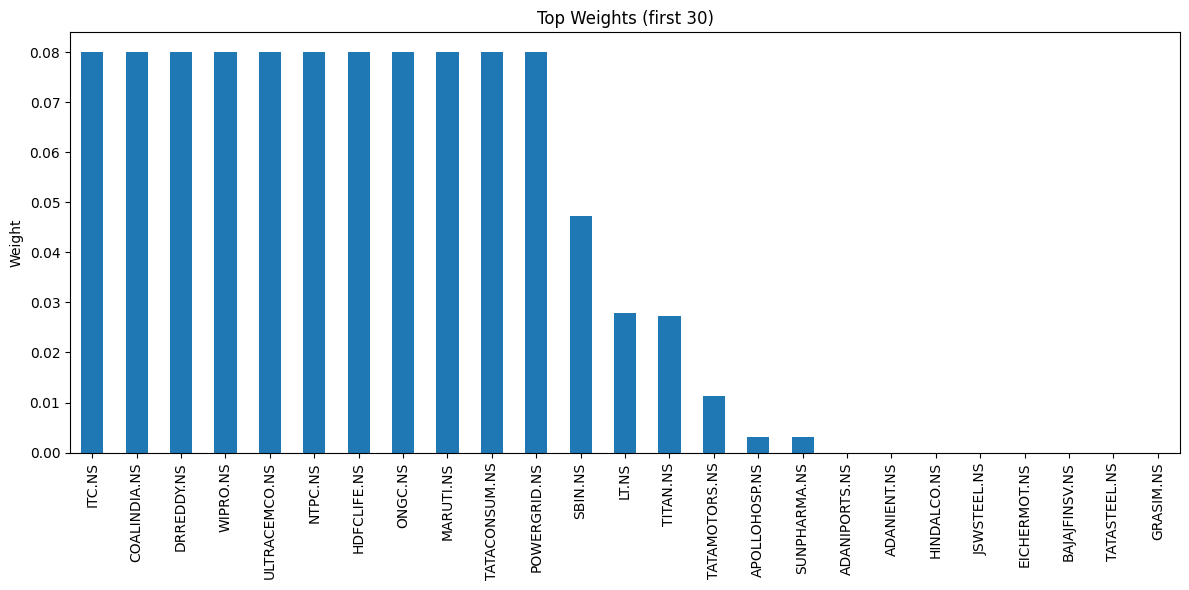

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
ML + Portfolio Optimization for a 1-Month Horizon (NSE)
------------------------------------------------------
- Input: array/list of NSE tickers (e.g., ["INFY.NS", "TCS.NS", ...])
- Label: next 21 trading-day (≈1 month) log return
- Model: simple blend of ElasticNet + RandomForest + GradientBoosting (sklearn) with Ridge stacker
- Risk model: Ledoit-Wolf shrinkage covariance on daily log returns
- Optimizer: PyPortfolioOpt EfficientFrontier (max Sharpe by default)

Outputs:
- data/selected_stocks.csv             (top-N by predicted 1-month return)
- data/optimal_weights.csv             (continuous weights)
- data/discrete_allocation.csv         (integer share allocation given CAPITAL)
- data/predictions_latest.csv          (per-stock predicted 1-month returns)
- data/weights_bar.png                 (bar plot of top weights)
- console summary of performance metrics

Install once:
    pip install --upgrade pandas numpy yfinance scikit-learn pypfopt matplotlib
    # Optional (faster/more consistent TA indicators):
    pip install TA-Lib   # requires system deps, or use wheels per your platform

Run:
    python portfolio_one_month_ml.py

Notes:
- Ensure your NSE tickers have the ".NS" suffix.
- You can load tickers from a JSON or CSV instead of hardcoding (see CONFIG).
- This is a research/starter script: no guarantees of performance!
"""
from __future__ import annotations

import os
import json
import math
import warnings
from dataclasses import dataclass
from typing import List, Tuple, Dict, Optional

import numpy as np
import pandas as pd

# Data and model
import yfinance as yf
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import ElasticNetCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.covariance import LedoitWolf

# Try TA-Lib (optional)
try:
    import talib as ta
    TA_AVAILABLE = True
except Exception:
    TA_AVAILABLE = False

# Optimization
from pypfopt import EfficientFrontier, objective_functions, DiscreteAllocation

# Plot (optional)
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=UserWarning)
pd.set_option("display.width", 200)
pd.set_option("display.max_columns", 200)


# ==============================
# CONFIG
# ==============================
@dataclass
class Config:
    # --- Provide your tickers here ---
    TICKERS: List[str] = None  # e.g., ["INFY.NS", "TCS.NS", ...]  # Keep ".NS" for NSE

    # You can alternatively load from files (set to a path or None)
    TICKERS_JSON: Optional[str] = None   # expects {"tickers": ["INFY.NS", "..."]}
    TICKERS_CSV: Optional[str]  = None   # expects a column named "ticker"

    START: str = "2018-01-01"
    END: Optional[str] = None  # until today

    # Label horizon (≈1 month ~ 21 trading days)
    HORIZON_DAYS: int = 21

    # Feature params
    RSI_LEN: int = 14
    MACD_FAST: int = 12
    MACD_SLOW: int = 26
    MACD_SIGNAL: int = 9

    # Model / CV
    N_SPLITS: int = 6
    GAP_DAYS: int = 21  # purge gap to avoid leakage (≈ horizon)
    RANDOM_STATE: int = 42

    # Portfolio selection
    TOP_N: int = 25         # choose top-N by predicted 1-month return for optimization
    WEIGHT_BOUNDS: Tuple[float, float] = (0.0, 0.08)  # cap per-stock to avoid concentration

    # Optimization objective: "max_sharpe" or "max_return"
    OPT_OBJECTIVE: str = "max_sharpe"
    L2_GAMMA: float = 0.1  # L2 penalty to reduce concentration (works with most objectives)

    # Allocation
    CAPITAL: float = 1_000_000.0
    FEES_BPS: float = 5.0  # 0.05% assumed for sizing (not used in optimizer, only discrete alloc metadata)

    # Output
    OUTDIR: str = "data"
    PLOT_WEIGHTS: bool = True


BASE_TICKERS = ['ADANIENT', 'ADANIPORTS', 'APOLLOHOSP', 'ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJFINANCE', 'BAJAJFINSV', 'BEL', 'BHARTIARTL', 'CIPLA', 'COALINDIA', 'DRREDDY', 'EICHERMOT', 'ETERNAL', 'GRASIM', 'HCLTECH', 'HDFCBANK', 'HDFCLIFE', 'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR', 'ICICIBANK', 'ITC', 'INDUSINDBK', 'INFY', 'JSWSTEEL', 'JIOFIN', 'KOTAKBANK', 'LT', 'M&M', 'MARUTI', 'NTPC', 'NESTLEIND', 'ONGC', 'POWERGRID', 'RELIANCE', 'SBILIFE', 'SHRIRAMFIN', 'SBIN', 'SUNPHARMA', 'TCS', 'TATACONSUM', 'TATAMOTORS', 'TATASTEEL', 'TECHM', 'TITAN', 'TRENT', 'ULTRACEMCO', 'WIPRO']

CFG = Config(
    # Example placeholder; REPLACE with your ~500 NSE tickers list:
    TICKERS=[ t + ".NS" for t in BASE_TICKERS ]
)


# ==============================
# Helpers
# ==============================
def load_tickers(cfg: Config) -> List[str]:
    if cfg.TICKERS and len(cfg.TICKERS) > 0:
        return cfg.TICKERS

    if cfg.TICKERS_JSON and os.path.exists(cfg.TICKERS_JSON):
        with open(cfg.TICKERS_JSON, "r") as f:
            data = json.load(f)
        return list(map(str, data.get("tickers", [])))

    if cfg.TICKERS_CSV and os.path.exists(cfg.TICKERS_CSV):
        df = pd.read_csv(cfg.TICKERS_CSV)
        # expect a "ticker" column
        if "ticker" not in df.columns:
            raise ValueError("CSV must contain a 'ticker' column.")
        return list(map(str, df["ticker"].dropna().unique().tolist()))

    raise ValueError("Please provide tickers via CFG.TICKERS or TICKERS_JSON/CSV.")


def download_prices(tickers: List[str], start: str, end: Optional[str]) -> pd.DataFrame:
    """
    Returns a wide dataframe with columns as tickers and rows as dates (Close).
    Skips tickers that fail download or have insufficient data.
    """
    print(f"Downloading data for {len(tickers)} tickers from {start} to {end or 'today'}...")
    out: Dict[str, pd.Series] = {}
    for t in tickers:
        try:
            df = yf.download(t, start=start, end=end, progress=False, auto_adjust=True, multi_level_index=False)
            if df is None or df.empty or "Close" not in df.columns:
                print(f"  - Skipping {t}: no data")
                continue
            s = df["Close"]
            if s is None or s.empty:
                print(f"  - Skipping {t}: empty Close series")
                continue
            s = s.dropna().copy()
            if s.index.nunique() < 300:
                print(f"  - Skipping {t}: too few rows ({len(s)})")
                continue
            if not isinstance(s, pd.Series):
                print(f"  - Skipping {t}: Close is not a Series ({type(s)})")
                continue
            out[t] = s
        except Exception as e:
            print(f"  - Skipping {t}: error {e}")
            continue

    if not out:
        raise RuntimeError("No usable tickers after download.")

    # Keep only proper Series values; build with concat for robust index alignment
    valid = {k: v for k, v in out.items() if isinstance(v, pd.Series) and v.ndim == 1 and len(v) > 0}
    invalid = set(out) - set(valid)
    for k in invalid:
        print(f"  - Dropping {k}: unexpected data shape")

    if not valid:
        raise RuntimeError("All downloaded series were invalid.")

    px = pd.concat(valid, axis=1)
    px.columns = list(valid.keys())
    px.index.name = "Date"
    print(f"Downloaded {len(valid)} usable tickers.")
    return px


def rsi(series: pd.Series, window: int = 14) -> pd.Series:
    delta = series.diff()
    up = np.where(delta > 0, delta, 0.0)
    down = np.where(delta < 0, -delta, 0.0)
    roll_up = pd.Series(up, index=series.index).ewm(alpha=1/window, adjust=False).mean()
    roll_down = pd.Series(down, index=series.index).ewm(alpha=1/window, adjust=False).mean()
    rs = roll_up / (roll_down + 1e-12)
    return 100 - (100 / (1 + rs))


def macd(series: pd.Series, fast: int = 12, slow: int = 26, signal: int = 9) -> Tuple[pd.Series, pd.Series]:
    ema_fast = series.ewm(span=fast, adjust=False).mean()
    ema_slow = series.ewm(span=slow, adjust=False).mean()
    line = ema_fast - ema_slow
    signal_line = line.ewm(span=signal, adjust=False).mean()
    return line, signal_line


def make_features(px: pd.DataFrame, cfg: Config) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Build cross-sectional features for each (date, ticker).
    Uses TA-Lib for indicators when available; falls back to pandas/np otherwise.
    Returns:
        X: features DataFrame indexed by (Date, Ticker)
        y: future HORIZON_DAYS log return as label
    """
    daily_ret = np.log(px / px.shift(1))
    ftrs: Dict[str, pd.DataFrame] = {}
    labels: Dict[str, pd.Series] = {}

    for t in px.columns:
        s = px[t].astype(float)
        r = daily_ret[t]

        if TA_AVAILABLE:
            close = s.values.astype(float)
            ret_vals = r.values.astype(float)

            # Momentum via ROC (percent -> fraction)
            mom3  = pd.Series(ta.ROC(close, timeperiod=3)  / 100.0, index=s.index)
            mom5  = pd.Series(ta.ROC(close, timeperiod=5)  / 100.0, index=s.index)
            mom10 = pd.Series(ta.ROC(close, timeperiod=10) / 100.0, index=s.index)
            mom21 = pd.Series(ta.ROC(close, timeperiod=21) / 100.0, index=s.index)

            # Realized vol on log-returns
            vol5  = pd.Series(ta.STDDEV(ret_vals, timeperiod=5),  index=s.index)
            vol10 = pd.Series(ta.STDDEV(ret_vals, timeperiod=10), index=s.index)
            vol21 = pd.Series(ta.STDDEV(ret_vals, timeperiod=21), index=s.index)

            # RSI
            rsi14 = pd.Series(ta.RSI(close, timeperiod=cfg.RSI_LEN), index=s.index)

            # Moving averages and distances
            sma5  = pd.Series(ta.SMA(close, timeperiod=5),  index=s.index)
            sma10 = pd.Series(ta.SMA(close, timeperiod=10), index=s.index)
            sma21 = pd.Series(ta.SMA(close, timeperiod=21), index=s.index)
            dist_sma5  = s / sma5  - 1.0
            dist_sma10 = s / sma10 - 1.0
            dist_sma21 = s / sma21 - 1.0

            # MACD
            macd_line_arr, macd_signal_arr, macd_hist_arr = ta.MACD(
                close,
                fastperiod=cfg.MACD_FAST,
                slowperiod=cfg.MACD_SLOW,
                signalperiod=cfg.MACD_SIGNAL
            )
            macd_line   = pd.Series(macd_line_arr,   index=s.index)
            macd_signal = pd.Series(macd_signal_arr, index=s.index)
            macd_hist   = pd.Series(macd_hist_arr,   index=s.index)

            # Z-score of returns using 20-day window
            ret_mean20 = pd.Series(ta.SMA(ret_vals, timeperiod=20), index=s.index)
            ret_std20  = pd.Series(ta.STDDEV(ret_vals, timeperiod=20), index=s.index)
            zret5 = (r - ret_mean20) / (ret_std20 + 1e-9)

        else:
            # Fallback (pandas/np path)
            mom3  = s.pct_change(3,  fill_method=None)
            mom5  = s.pct_change(5,  fill_method=None)
            mom10 = s.pct_change(10, fill_method=None)
            mom21 = s.pct_change(21, fill_method=None)

            vol5  = r.rolling(5).std()
            vol10 = r.rolling(10).std()
            vol21 = r.rolling(21).std()

            # RSI (EWMA approximation)
            rsi14 = rsi(s, cfg.RSI_LEN)

            # Moving averages and distances
            sma5  = s.rolling(5).mean()
            sma10 = s.rolling(10).mean()
            sma21 = s.rolling(21).mean()
            dist_sma5  = s / sma5  - 1.0
            dist_sma10 = s / sma10 - 1.0
            dist_sma21 = s / sma21 - 1.0

            # MACD
            macd_line, macd_signal = macd(s, cfg.MACD_FAST, cfg.MACD_SLOW, cfg.MACD_SIGNAL)
            macd_hist = macd_line - macd_signal

            # Z-score of returns
            zret5 = (r - r.rolling(20).mean()) / (r.rolling(20).std() + 1e-9)

        df = pd.DataFrame({
            "mom3": mom3, "mom5": mom5, "mom10": mom10, "mom21": mom21,
            "vol5": vol5, "vol10": vol10, "vol21": vol21,
            "rsi14": rsi14,
            "dist_sma5": dist_sma5, "dist_sma10": dist_sma10, "dist_sma21": dist_sma21,
            "macd_line": macd_line, "macd_signal": macd_signal, "macd_hist": macd_hist,
            "zret5": zret5,
        })

        # Label: future HORIZON_DAYS log return
        fut_ret = np.log(s.shift(-cfg.HORIZON_DAYS) / s)
        ftrs[t] = df
        labels[t] = fut_ret

    # Stack to long format
    X = pd.concat(ftrs, axis=1)  # columns = MultiIndex (feature per ticker)
    y = pd.concat(labels, axis=1)  # columns = tickers

    X_long = (
        X.stack(level=0, future_stack=True)
        .rename_axis(index=["Date", "Ticker"])
        .sort_index()
    )
    y_long = (
        y.stack(future_stack=True)
        .rename("y")
        .rename_axis(index=["Date", "Ticker"])
        .sort_index()
        .to_frame()
    )

    # Align and drop NaNs
    df = X_long.join(y_long, how="inner")
    df = df.dropna()
    return df.drop(columns=["y"]), df[["y"]]


def build_models(random_state: int = 42):
    models = {
        "enet": ElasticNetCV(
            l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9],
            alphas=np.logspace(-4, 1, 20),
            max_iter=10000,
            cv=3,
            n_jobs=None,
            random_state=random_state,
        ),
        "rf": RandomForestRegressor(
            n_estimators=400, max_depth=6, min_samples_leaf=5, random_state=random_state, n_jobs=-1
        ),
        "gbr": GradientBoostingRegressor(
            n_estimators=300, learning_rate=0.05, max_depth=3, random_state=random_state
        ),
    }
    return models


def walk_forward_oof(X: pd.DataFrame, y: pd.Series, cfg: Config):
    """
    Produce out-of-fold predictions and a simple stacked model on top.
    """
    tscv = TimeSeriesSplit(n_splits=cfg.N_SPLITS, gap=cfg.GAP_DAYS)
    models = build_models(cfg.RANDOM_STATE)
    oof_preds = {name: np.full(len(y), np.nan) for name in models}
    idx = y.index  # MultiIndex (Date, Ticker)

    for fold, (tr, va) in enumerate(tscv.split(X), start=1):
        X_tr, X_va = X.iloc[tr], X.iloc[va]
        y_tr, y_va = y.iloc[tr], y.iloc[va]
        print(f"Fold {fold}: train={X_tr.shape} valid={X_va.shape}")

        for name, mdl in models.items():
            mdl.fit(X_tr, y_tr)
            p = mdl.predict(X_va)
            oof_preds[name][va] = p

    # Compute RMSE per base model
    for name in models.keys():
        mask = ~np.isnan(oof_preds[name])
        rmse = math.sqrt(mean_squared_error(y.values[mask], oof_preds[name][mask]))
        print(f"{name:4s} OOF RMSE: {rmse:.6f}")

    # Simple stacked meta-model (Ridge)
    oof_df = pd.DataFrame({k: v for k, v in oof_preds.items()}, index=idx).dropna()
    meta = RidgeCV(alphas=np.logspace(-4, 2, 20))
    meta.fit(oof_df.values, y.loc[oof_df.index].values)
    meta_rmse = math.sqrt(mean_squared_error(y.loc[oof_df.index].values, meta.predict(oof_df.values)))
    print(f"stack OOF RMSE: {meta_rmse:.6f}")

    # Fit all models on FULL data
    for name, mdl in models.items():
        mdl.fit(X, y)
    meta.fit(pd.DataFrame({k: mdl.predict(X) for k, mdl in models.items()}), y)

    return models, meta


def latest_features(X: pd.DataFrame) -> pd.DataFrame:
    """
    Filter to the last date per ticker for latest prediction snapshot.
    """
    # X is indexed by (Date, Ticker)
    last_dates = X.reset_index().groupby("Ticker")["Date"].max()
    mask = X.reset_index().merge(last_dates, on=["Ticker", "Date"], how="inner").set_index(["Date", "Ticker"]).index
    X_last = X.loc[mask].sort_index()
    return X_last


def predict_latest(models: Dict[str, any], meta, X: pd.DataFrame) -> pd.DataFrame:
    base_preds = {name: mdl.predict(X) for name, mdl in models.items()}
    base_df = pd.DataFrame(base_preds, index=X.index)
    stack_pred = meta.predict(base_df)
    out = base_df.copy()
    out["stack"] = stack_pred
    return out


def annualize_from_horizon(r_horizon: pd.Series, horizon_days: int) -> pd.Series:
    """
    Convert horizon log-return expectation to annualized mean simple return for optimizer.
    - r_horizon is in log-returns (as the model was trained on).
    """
    # Expected simple return over horizon
    exp_simple = np.expm1(r_horizon)  # e^r - 1
    ann = (1.0 + exp_simple) ** (252.0 / horizon_days) - 1.0
    return ann


def select_top_by_prediction(pred_df: pd.DataFrame, top_n: int) -> pd.Index:
    # pred_df indexed by (Date, Ticker), column 'stack'
    last_day = pred_df.index.get_level_values("Date").max()
    sdf = pred_df.xs(last_day, level="Date")
    sdf = sdf.sort_values("stack", ascending=False)
    return sdf.head(top_n).index


def build_covariance(px: pd.DataFrame, selected: List[str]) -> pd.DataFrame:
    # Daily log returns
    r = np.log(px[selected] / px[selected].shift(1)).dropna(how="all")
    # Ledoit-Wolf shrinkage for robust covariance
    lw = LedoitWolf().fit(r.fillna(0).values)
    cov = pd.DataFrame(lw.covariance_, index=selected, columns=selected)
    # Annualize
    cov = cov * 252.0
    return cov


def optimize_weights_safe(mu: pd.Series, cov: pd.DataFrame, cfg: Config) -> Dict[str, float]:
    """
    Robust wrapper that avoids infeasible bound issues and tries a few fallbacks.
    """
    n = len(mu)
    lb, ub = cfg.WEIGHT_BOUNDS

    # Auto-fix tight bounds (ensure full investment possible)
    if ub * n < 0.999:
        suggested = max(ub, min(0.5, 1.0 / max(1, n) + 0.05))
        print(f"[Auto-fix] Infeasible bounds: n_assets={n}, upper={ub:.2f} -> bumping to {suggested:.2f}")
        ub = suggested

    # Attempt 1: chosen objective (default max_sharpe)
    try:
        ef = EfficientFrontier(mu, cov, weight_bounds=(lb, ub))
        ef.add_objective(objective_functions.L2_reg, gamma=cfg.L2_GAMMA)
        if cfg.OPT_OBJECTIVE == "max_return":
            ef.max_quadratic_utility(risk_aversion=1e-8)
        else:
            ef.max_sharpe()
        w = ef.clean_weights()
        ef.portfolio_performance(verbose=True)
        return w
    except Exception as e:
        print(f"[Warn] Primary optimization failed: {e}")

    # Attempt 2: quadratic utility
    try:
        ef = EfficientFrontier(mu, cov, weight_bounds=(lb, ub))
        ef.add_objective(objective_functions.L2_reg, gamma=cfg.L2_GAMMA)
        ef.max_quadratic_utility(risk_aversion=1e-6)
        w = ef.clean_weights()
        ef.portfolio_performance(verbose=True)
        print("[Fallback] Used max_quadratic_utility")
        return w
    except Exception as e:
        print(f"[Warn] Fallback quadratic utility failed: {e}")

    # Attempt 3: allow cash (sum(w) <= 1) and retry max_sharpe
    try:
        ef = EfficientFrontier(mu, cov, weight_bounds=(lb, ub))
        ef.add_constraint(lambda w: w.sum() <= 1)  # allow cash
        ef.add_objective(objective_functions.L2_reg, gamma=cfg.L2_GAMMA)
        ef.max_sharpe()
        w = ef.clean_weights()
        ef.portfolio_performance(verbose=True)
        print("[Fallback] Allowed cash (sum(w) <= 1)")
        return w
    except Exception as e:
        print(f"[Error] All optimization attempts failed: {e}")
        raise


def discrete_allocation(weights: Dict[str, float], last_prices: pd.Series, capital: float) -> Tuple[Dict[str, int], float]:
    # 1) Ensure Series with no NaNs
    prices = last_prices.dropna()
    if not isinstance(prices, pd.Series):
        prices = pd.Series(prices)
    if prices.empty:
        raise ValueError('No valid latest prices available for discrete allocation.')

    # 2) Strong alignment of weights to prices index
    w_series = pd.Series(weights, dtype=float)
    w_series = w_series.reindex(prices.index).fillna(0.0)

    # 3) Keep positive-weight names only
    mask_pos = w_series > 0
    if not mask_pos.any():
        raise ValueError('All weights are zero after aligning with latest prices.')
    w_series = w_series[mask_pos]
    prices = prices[w_series.index]

    # 4) Renormalize to sum to 1 over available names
    total_w = w_series.sum()
    if total_w <= 0:
        raise ValueError('Sum of positive weights is zero.')
    w_series = w_series / total_w

    # 5) Try LP first; if it fails for any reason, use greedy fallback
    da = DiscreteAllocation(w_series.to_dict(), prices, total_portfolio_value=capital)
    try:
        alloc, leftover = da.lp_portfolio()
        return alloc, leftover
    except Exception as e:
        print(f"[Warn] LP allocation failed ({e}); using greedy fallback.")
        alloc, leftover = da.greedy_portfolio(reinvest=False)
        return alloc, leftover


def main(cfg: Config):
    os.makedirs(cfg.OUTDIR, exist_ok=True)

    # 1) Tickers
    tickers = load_tickers(cfg)
    print(f"Tickers provided: {len(tickers)} (showing first 10): {tickers[:10]}")

    # 2) Data
    px = download_prices(tickers, cfg.START, cfg.END)
    # Keep only tickers present in px
    tickers = [t for t in tickers if t in px.columns]

    # 3) Features & Label
    X, ydf = make_features(px, cfg)
    y = ydf["y"]

    # 4) Walk-forward OOF + fit final models
    models, meta = walk_forward_oof(X, y, cfg)

    # 5) Latest snapshot predictions
    X_last = latest_features(X)
    preds_last = predict_latest(models, meta, X_last)
    preds_last = preds_last.reset_index().rename(columns={"stack": "pred_logret_horizon"})
    # Keep only latest date
    latest_date = preds_last["Date"].max()
    preds_today = preds_last[preds_last["Date"] == latest_date].copy()

    # 6) Select top-N by predicted 1-month log return
    preds_today.set_index(["Date", "Ticker"], inplace=True)
    top_idx = select_top_by_prediction(preds_today[["pred_logret_horizon"]].rename(columns={"pred_logret_horizon":"stack"}), cfg.TOP_N)
    selected = list(top_idx)
    print(f"Selected {len(selected)} (requested TOP_N={cfg.TOP_N}): {selected[:10]}{'...' if len(selected)>10 else ''}")

    # 7) Build expected returns (annualized) & covariance
    # Convert predicted log return over horizon to annualized simple return
    pred_map = preds_today["pred_logret_horizon"].xs(latest_date, level="Date")
    mu_ann = annualize_from_horizon(pred_map[selected], cfg.HORIZON_DAYS)
    cov_ann = build_covariance(px, selected)

    # Save diagnostics
    preds_today.reset_index().to_csv(os.path.join(cfg.OUTDIR, "predictions_latest.csv"), index=False)
    pd.Series(selected, name="ticker").to_csv(os.path.join(cfg.OUTDIR, "selected_stocks.csv"), index=False)

    # 8) Optimize weights
    weights = optimize_weights_safe(mu_ann, cov_ann, cfg)
    w_series = pd.Series(weights).sort_values(ascending=False)
    w_series.to_csv(os.path.join(cfg.OUTDIR, "optimal_weights.csv"), header=["weight"])

    # 9) Discrete allocation given CAPITAL
    last_px = px[selected].ffill().iloc[-1]
    alloc, leftover = discrete_allocation(weights, last_px, cfg.CAPITAL)
    alloc_df = pd.DataFrame({"shares": pd.Series(alloc)}).sort_values("shares", ascending=False)
    alloc_df["price"] = last_px.reindex(alloc_df.index)
    alloc_df["alloc_value"] = alloc_df["shares"] * alloc_df["price"]
    alloc_df.to_csv(os.path.join(cfg.OUTDIR, "discrete_allocation.csv"))
    print(f"Discrete allocation leftover cash: ₹{leftover:,.2f}")

    # 10) Optional: bar plot of weights
    if cfg.PLOT_WEIGHTS:
        plt.figure(figsize=(12, 6))
        w_series.head(30).plot(kind="bar")
        plt.title("Top Weights (first 30)")
        plt.ylabel("Weight")
        plt.tight_layout()
        plt.savefig(os.path.join(cfg.OUTDIR, "weights_bar.png"), dpi=150)

    # 11) Summary
    exp_ret = (weights and sum(mu_ann.reindex(weights.keys()) * pd.Series(weights))) or np.nan
    exp_vol = np.sqrt(
        np.dot(pd.Series(weights).values, np.dot(cov_ann.values, pd.Series(weights).values))
    )
    sharpe = (exp_ret / exp_vol) if exp_vol > 0 else np.nan
    print("\n=== Portfolio Summary (based on model expectations) ===")
    print(f"Latest date:             {latest_date.date()}")
    print(f"Selected tickers:        {len(selected)}")
    print(f"Expected annual return:  {exp_ret:.2%}")
    print(f"Expected annual vol:     {exp_vol:.2%}")
    print(f"Expected Sharpe (rf=0):  {sharpe:.2f}")
    print(f"Weight bounds:           {cfg.WEIGHT_BOUNDS}")
    print(f"Objective:               {cfg.OPT_OBJECTIVE} (with L2 gamma={cfg.L2_GAMMA})")
    print(f"Capital for discrete:    ₹{cfg.CAPITAL:,.0f}")
    print(f"Outputs saved under:     {cfg.OUTDIR}/")


if __name__ == "__main__":
    main(CFG)
